In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime

%matplotlib inline

In [2]:
df_raw = pd.read_csv('crypto_prices.csv')

In [3]:
df_raw.set_index("dtime", inplace = True)
df_raw = df_raw.reindex(index=df_raw.index[::-1])
df_raw = df_raw.drop(columns = ['time'])

In [4]:
df_raw.head()

,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,log_vwap_BTC,...,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
dtime,,,,,,,,,,,,,,,,,,,,,
2020-09-18,10944.8,11039.1,10882.3,10949.6,10955.4,1205.851639,5998,9.309199,9.294893,9.301588,...,48.89,49.04,48.25,48.61,48.58,9171.458077,550,3.892636,3.876396,3.883212
2020-09-17,10951.1,11043.2,10750.3,10944.8,10878.9,3387.945447,25530,9.309570,9.282689,9.294580,...,47.73,49.57,47.68,48.89,48.59,16512.480430,1498,3.903386,3.864512,3.883418
2020-09-16,10785.2,11097.9,10670.2,10951.1,10941.7,4155.036210,43022,9.314511,9.275210,9.300336,...,48.31,48.76,46.98,47.73,47.97,27210.897291,2007,3.886910,3.849722,3.870576
2020-09-15,10675.0,10935.0,10620.0,10785.2,10790.4,4280.924355,17159,9.299724,9.270494,9.286412,...,49.09,50.31,48.18,48.31,49.00,32381.530226,2143,3.918204,3.874944,3.891820
2020-09-14,10328.2,10740.2,10251.2,10674.9,10550.5,3833.824636,14512,9.281749,9.235150,9.263929,...,48.16,49.61,47.16,49.09,48.24,20583.873788,1775,3.904192,3.853546,3.876189


In [5]:
df_copy = df_raw.copy()

In [6]:
df_copy.head()

,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,log_vwap_BTC,...,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
dtime,,,,,,,,,,,,,,,,,,,,,
2020-09-18,10944.8,11039.1,10882.3,10949.6,10955.4,1205.851639,5998,9.309199,9.294893,9.301588,...,48.89,49.04,48.25,48.61,48.58,9171.458077,550,3.892636,3.876396,3.883212
2020-09-17,10951.1,11043.2,10750.3,10944.8,10878.9,3387.945447,25530,9.309570,9.282689,9.294580,...,47.73,49.57,47.68,48.89,48.59,16512.480430,1498,3.903386,3.864512,3.883418
2020-09-16,10785.2,11097.9,10670.2,10951.1,10941.7,4155.036210,43022,9.314511,9.275210,9.300336,...,48.31,48.76,46.98,47.73,47.97,27210.897291,2007,3.886910,3.849722,3.870576
2020-09-15,10675.0,10935.0,10620.0,10785.2,10790.4,4280.924355,17159,9.299724,9.270494,9.286412,...,49.09,50.31,48.18,48.31,49.00,32381.530226,2143,3.918204,3.874944,3.891820
2020-09-14,10328.2,10740.2,10251.2,10674.9,10550.5,3833.824636,14512,9.281749,9.235150,9.263929,...,48.16,49.61,47.16,49.09,48.24,20583.873788,1775,3.904192,3.853546,3.876189


In [7]:
df_copy.isna().sum()

open_BTC        0
high_BTC        0
low_BTC         0
close_BTC       0
vwap_BTC        0
volume_BTC      0
count_BTC       0
log_high_BTC    0
log_low_BTC     0
log_vwap_BTC    0
open_ETH        0
high_ETH        0
low_ETH         0
close_ETH       0
vwap_ETH        0
volume_ETH      0
count_ETH       0
log_high_ETH    0
log_low_ETH     0
log_vwap_ETH    0
open_LTC        0
high_LTC        0
low_LTC         0
close_LTC       0
vwap_LTC        0
volume_LTC      0
count_LTC       0
log_high_LTC    0
log_low_LTC     0
log_vwap_LTC    0
dtype: int64

In [8]:
# Creating a test split
# Talk to Blake about this.

size = int(len(df_copy) * 0.8)

In [27]:
df = df_copy.iloc[size:]

In [28]:
df_test = df_copy.iloc[:size]

In [30]:
df.head()

,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,log_vwap_BTC,...,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
dtime,,,,,,,,,,,,,,,,,,,,,
2019-02-20,3888.5,3962.5,3865.7,3942.0,3916.6,5841.967019,9434,8.284630,8.259898,8.272979,...,46.85,52.25,46.10,51.13,49.62,50718.231778,3036,3.956040,3.830813,3.904394
2019-02-19,3870.1,3975.0,3838.2,3888.1,3912.3,7602.095676,12230,8.287780,8.252759,8.271881,...,47.47,48.89,46.44,46.90,47.51,23443.795227,1859,3.889573,3.838161,3.860940
2019-02-18,3625.1,3926.0,3617.0,3870.7,3775.4,11387.816221,17609,8.275376,8.193400,8.236262,...,43.35,48.71,43.20,47.40,45.75,53029.132394,3420,3.885884,3.765840,3.823192
2019-02-17,3580.1,3675.0,3552.7,3625.1,3596.2,3861.961078,7068,8.209308,8.175463,8.187633,...,42.96,45.00,42.01,43.35,43.16,21009.956803,1442,3.806662,3.737908,3.764914
2019-02-16,3567.4,3613.3,3562.7,3580.1,3589.5,2089.142354,4270,8.192377,8.178274,8.185768,...,42.16,44.04,41.75,42.96,43.18,22896.666555,1456,3.785098,3.731699,3.765377


In [31]:
df_test.head()

,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,log_vwap_BTC,...,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
dtime,,,,,,,,,,,,,,,,,,,,,
2020-09-18,10944.8,11039.1,10882.3,10949.6,10955.4,1205.851639,5998,9.309199,9.294893,9.301588,...,48.89,49.04,48.25,48.61,48.58,9171.458077,550,3.892636,3.876396,3.883212
2020-09-17,10951.1,11043.2,10750.3,10944.8,10878.9,3387.945447,25530,9.309570,9.282689,9.294580,...,47.73,49.57,47.68,48.89,48.59,16512.480430,1498,3.903386,3.864512,3.883418
2020-09-16,10785.2,11097.9,10670.2,10951.1,10941.7,4155.036210,43022,9.314511,9.275210,9.300336,...,48.31,48.76,46.98,47.73,47.97,27210.897291,2007,3.886910,3.849722,3.870576
2020-09-15,10675.0,10935.0,10620.0,10785.2,10790.4,4280.924355,17159,9.299724,9.270494,9.286412,...,49.09,50.31,48.18,48.31,49.00,32381.530226,2143,3.918204,3.874944,3.891820
2020-09-14,10328.2,10740.2,10251.2,10674.9,10550.5,3833.824636,14512,9.281749,9.235150,9.263929,...,48.16,49.61,47.16,49.09,48.24,20583.873788,1775,3.904192,3.853546,3.876189


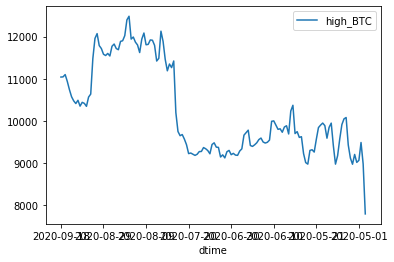

In [25]:
df_test.plot(y=['high_BTC'])

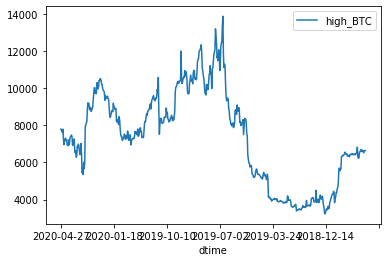

In [26]:
df.plot(y=['high_BTC'])

---

In [32]:
df_copy.head()

,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,log_vwap_BTC,...,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
dtime,,,,,,,,,,,,,,,,,,,,,
2020-09-18,10944.8,11039.1,10882.3,10949.6,10955.4,1205.851639,5998,9.309199,9.294893,9.301588,...,48.89,49.04,48.25,48.61,48.58,9171.458077,550,3.892636,3.876396,3.883212
2020-09-17,10951.1,11043.2,10750.3,10944.8,10878.9,3387.945447,25530,9.309570,9.282689,9.294580,...,47.73,49.57,47.68,48.89,48.59,16512.480430,1498,3.903386,3.864512,3.883418
2020-09-16,10785.2,11097.9,10670.2,10951.1,10941.7,4155.036210,43022,9.314511,9.275210,9.300336,...,48.31,48.76,46.98,47.73,47.97,27210.897291,2007,3.886910,3.849722,3.870576
2020-09-15,10675.0,10935.0,10620.0,10785.2,10790.4,4280.924355,17159,9.299724,9.270494,9.286412,...,49.09,50.31,48.18,48.31,49.00,32381.530226,2143,3.918204,3.874944,3.891820
2020-09-14,10328.2,10740.2,10251.2,10674.9,10550.5,3833.824636,14512,9.281749,9.235150,9.263929,...,48.16,49.61,47.16,49.09,48.24,20583.873788,1775,3.904192,3.853546,3.876189


In [33]:
df_copy.columns

Index(['open_BTC', 'high_BTC', 'low_BTC', 'close_BTC', 'vwap_BTC',
       'volume_BTC', 'count_BTC', 'log_high_BTC', 'log_low_BTC',
       'log_vwap_BTC', 'open_ETH', 'high_ETH', 'low_ETH', 'close_ETH',
       'vwap_ETH', 'volume_ETH', 'count_ETH', 'log_high_ETH', 'log_low_ETH',
       'log_vwap_ETH', 'open_LTC', 'high_LTC', 'low_LTC', 'close_LTC',
       'vwap_LTC', 'volume_LTC', 'count_LTC', 'log_high_LTC', 'log_low_LTC',
       'log_vwap_LTC'],
      dtype='object')

In [34]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

Test different Bitcoin prices and returns for stationarity.

In [36]:
sts.adfuller(df_copy['high_BTC'])

(-1.8019469948935494,
 0.379495494031735,
 4,
 715,
 {'1%': -3.4395289262948894,
  '5%': -2.8655907692307694,
  '10%': -2.5689271030368235},
 9990.615360277772)

In [37]:
sts.adfuller(df_copy['log_high_BTC'])

(-1.5807849013933721,
 0.4932382872560249,
 4,
 715,
 {'1%': -3.4395289262948894,
  '5%': -2.8655907692307694,
  '10%': -2.5689271030368235},
 -2586.221618789985)